# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/engineering-graduate-salary-prediction/Engineering_graduate_salary.csv')
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [4]:
df.drop(['ID', 'DOB', 'CollegeID', '12graduation' ,'10board', '12board' , 'CollegeState'
                                     ,'CollegeCityID', 'CollegeCityTier'
                                         ,'GraduationYear'], axis = 1, inplace = True)
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   CollegeTier            2998 non-null   int64  
 4   Degree                 2998 non-null   object 
 5   Specialization         2998 non-null   object 
 6   collegeGPA             2998 non-null   float64
 7   English                2998 non-null   int64  
 8   Logical                2998 non-null   int64  
 9   Quant                  2998 non-null   int64  
 10  Domain                 2998 non-null   float64
 11  ComputerProgramming    2998 non-null   int64  
 12  ElectronicsAndSemicon  2998 non-null   int64  
 13  ComputerScience        2998 non-null   int64  
 14  MechanicalEngg         2998 non-null   int64  
 15  Elec

In [7]:
df.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [8]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [9]:
df.Degree.unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [10]:
df.Specialization.value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [11]:
specialization = df.Specialization.value_counts(ascending = False)
specialization

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [12]:
specializationlessthan10 = specialization[specialization<=10]
specializationlessthan10

Specialization
other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & produc

In [13]:
def removespeciallessthan10(value):
    if value in specializationlessthan10:
        return 'other'
    else:
        return value
df.Specialization = df.Specialization.apply(removespeciallessthan10)

In [14]:
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application', 'other',
       'electrical engineering', 'electronics and electrical engineering',
       'information science engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering', 'civil engineering'],
      dtype=object)

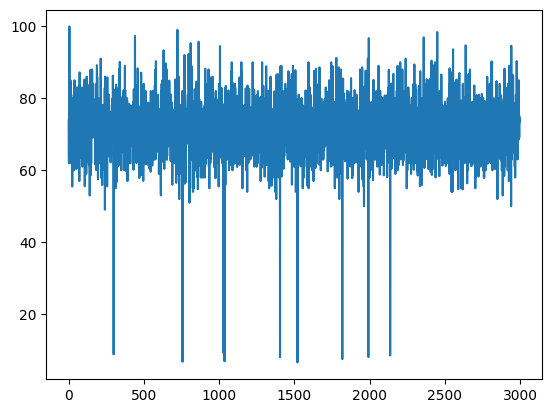

In [15]:
plt.plot(df.index, df['collegeGPA'])

In [16]:
df = df[(df['collegeGPA']>30)]
df.shape

(2989, 24)

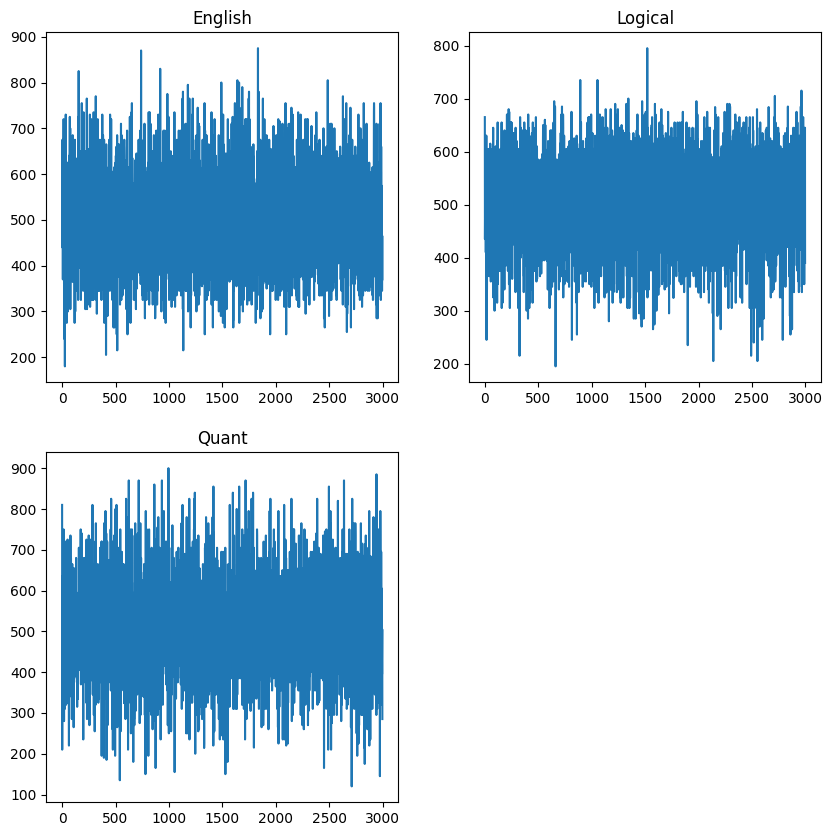

In [17]:

plt.figure(figsize=(10, 10))

# Line graph for 'English'
plt.subplot(2, 2, 1)
plt.plot(df.index, df.English)
plt.title('English')

# Line graph for 'Logical'
plt.subplot(2, 2, 2)
plt.plot(df.index, df.Logical)
plt.title('Logical')

# Line graph for 'Quant'
plt.subplot(2, 2, 3)
plt.plot(df.index, df.Quant)
plt.title('Quant')

plt.show()


In [18]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


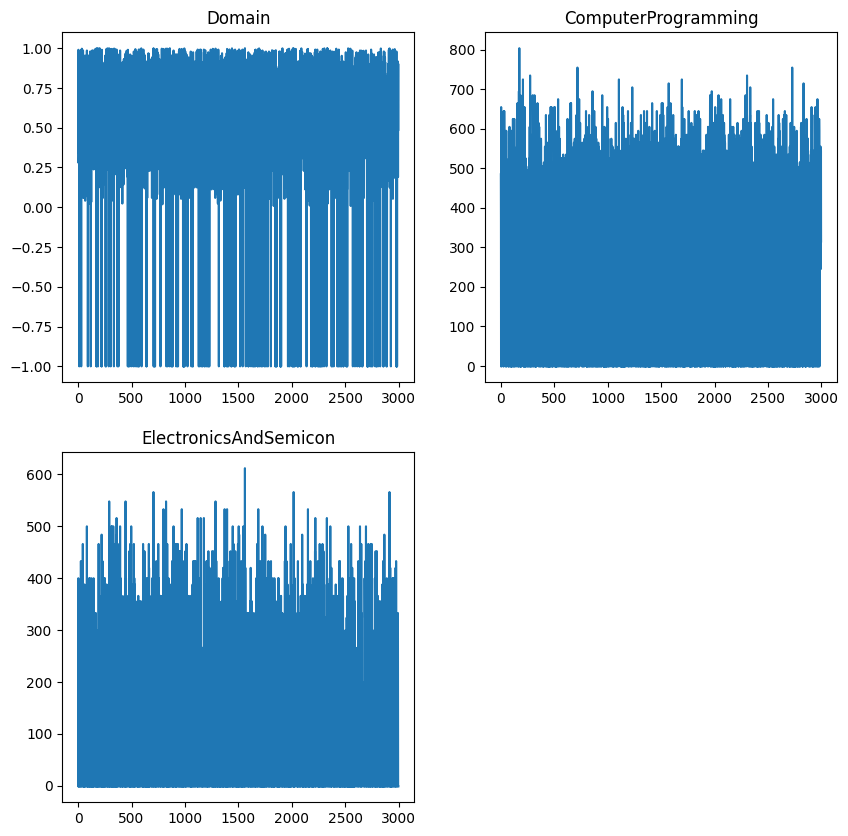

In [19]:
plt.figure(figsize=(10, 10))

# Line graph for 'Domain'
plt.subplot(2, 2, 1)
plt.plot(df.index, df.Domain)
plt.title('Domain')

# Line graph for 'ComputerProgramming'
plt.subplot(2, 2, 2)
plt.plot(df.index, df.ComputerProgramming)
plt.title('ComputerProgramming')

# Line graph for 'ElectronicsAndSemicon'
plt.subplot(2, 2, 3)
plt.plot(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.show()

In [20]:
df = df.replace(-1, np.nan)

In [21]:
cols_with_nan = [column for column in df.columns if df.isna().sum()[column] > 0]
for column in cols_with_nan:
    df[column] = df[column].fillna(df[column].mean())

In [22]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: xlabel='Gender_Category', ylabel='count'>

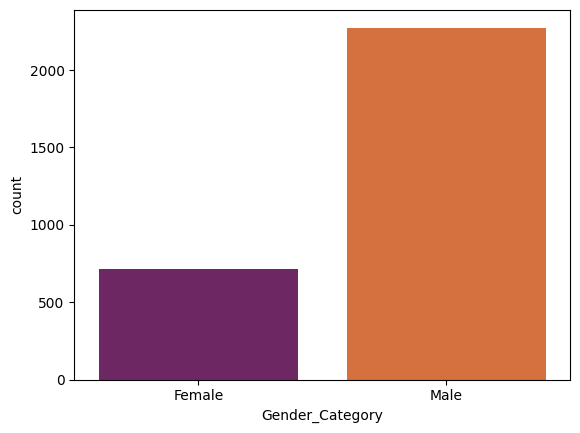

In [23]:
df['Gender_Category'] = df['Gender'].map({'f': 'Female', 'm': 'Male'})
sns.countplot(x='Gender_Category', data=df, palette='inferno')


<Axes: xlabel='10percentage', ylabel='12percentage'>

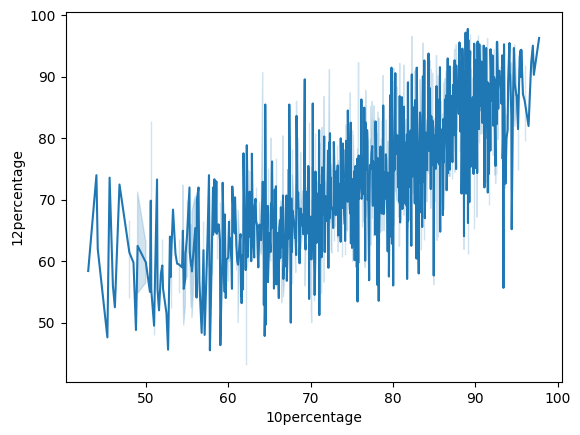

In [24]:
sns.lineplot(x=df['10percentage'], y=df['12percentage'])

<Axes: xlabel='10percentage', ylabel='12percentage'>

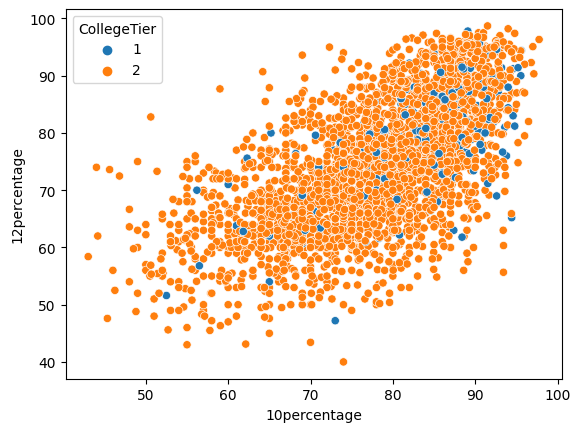

In [25]:
df['CollegeTier'] = df['CollegeTier'].astype('category')

# Create the scatter plot with hue based on 'CollegeTier'
sns.scatterplot(x=df['10percentage'], y=df['12percentage'], hue=df['CollegeTier'])

In [26]:
df.drop(['10percentage'], axis = 1, inplace = True)

Because 10 and 12 are linearly related

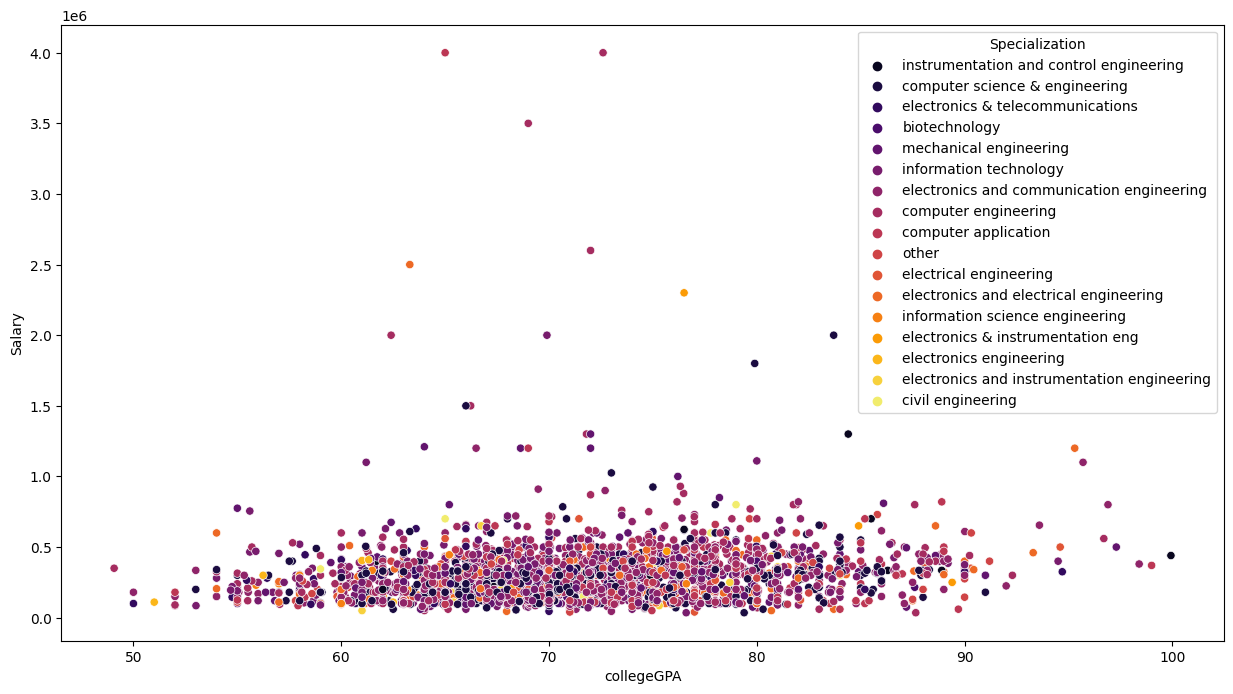

In [27]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['collegeGPA'], y=df['Salary'], hue=df['Specialization'], palette='inferno')
plt.show()

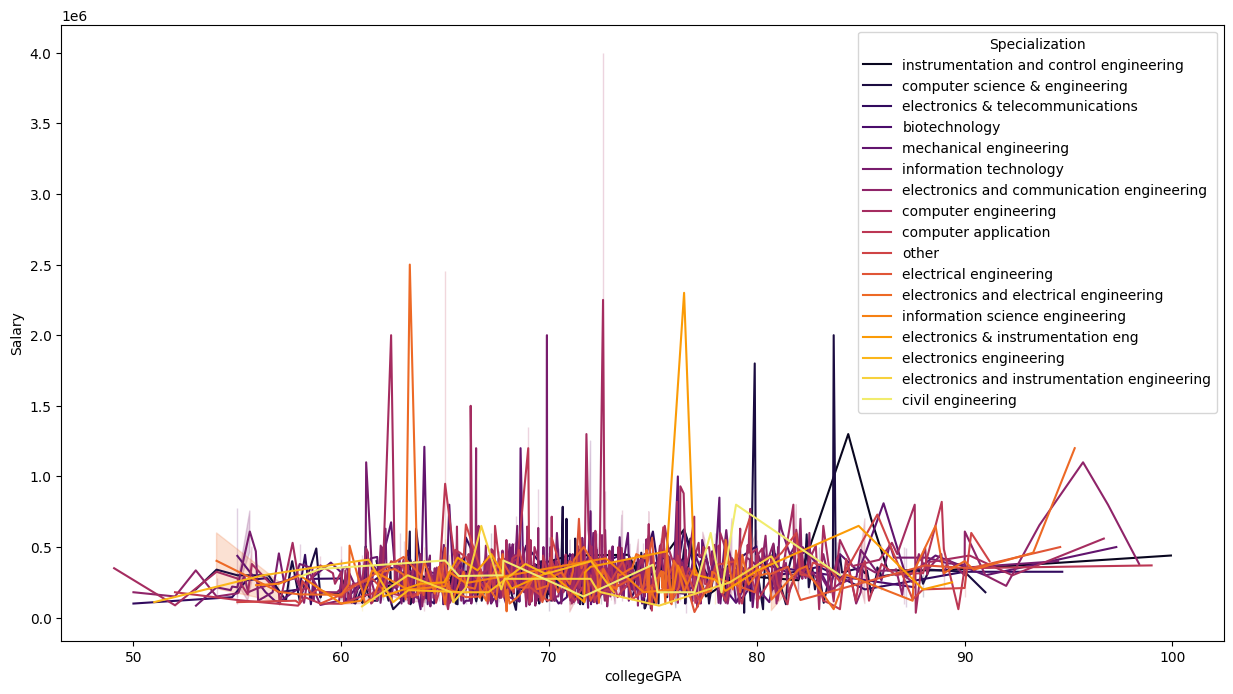

In [28]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=df['collegeGPA'], y=df['Salary'], hue=df['Specialization'], palette='inferno')
plt.show()

no correlation between GPA and salary

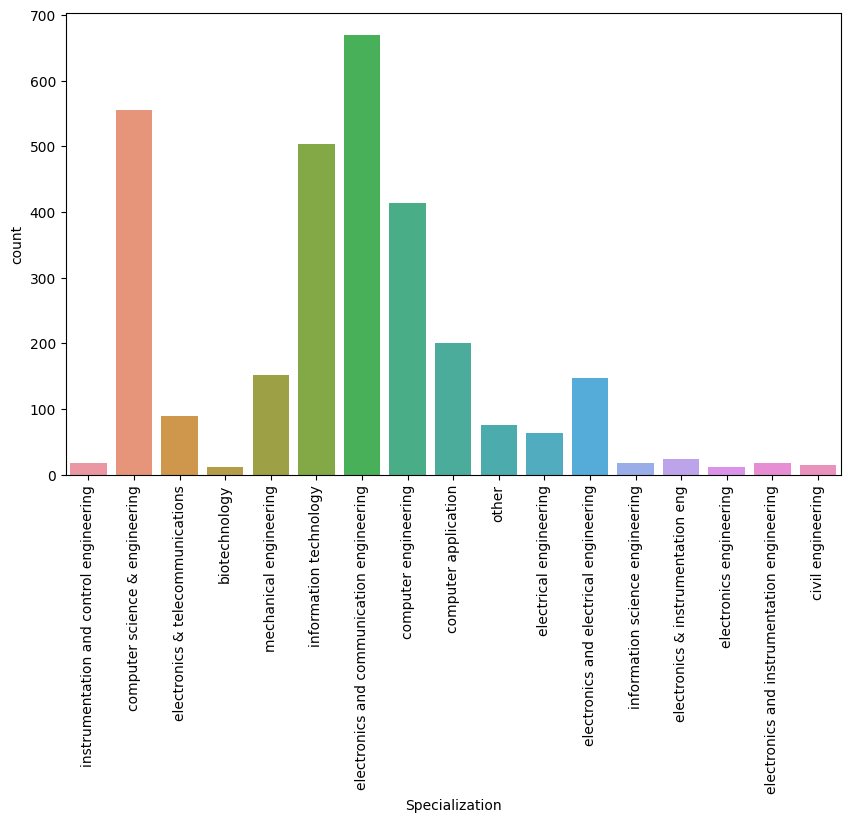

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Specialization', data=df)
plt.xticks(rotation=90)
plt.show()

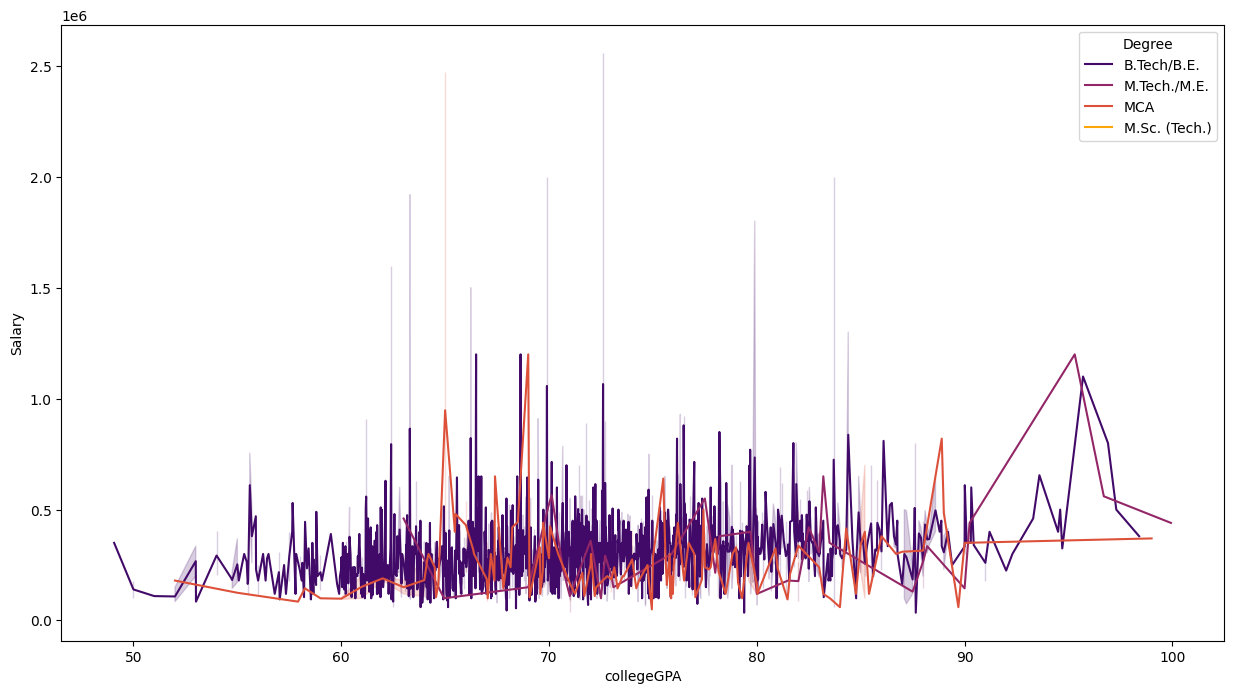

In [30]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=df['collegeGPA'], y=df['Salary'], hue=df['Degree'], palette='inferno')
plt.show()

Btech get a bit higher salary

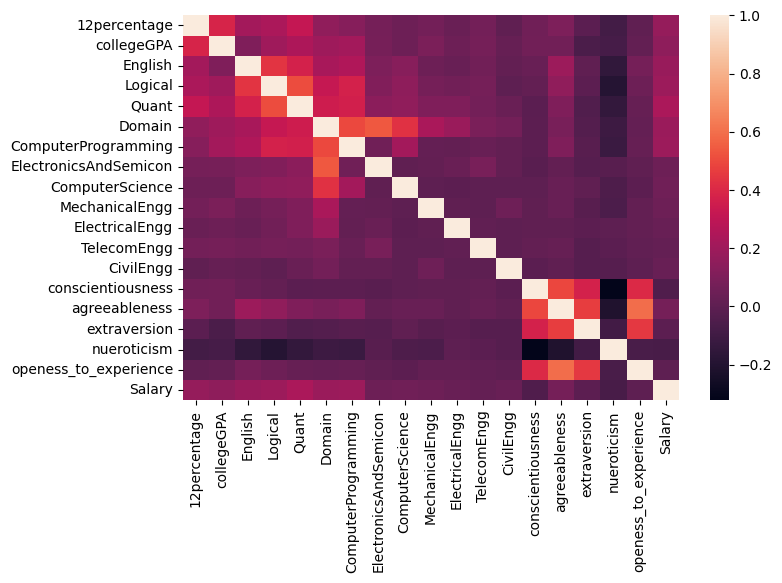

In [31]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr())
plt.show()

# Data Preprocessing and Model

In [32]:
df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Gender_Category
0,f,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,...,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,Female
1,m,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,...,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,Male
2,m,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,...,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,Male
3,m,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,...,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,Male
4,f,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,...,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,Female


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Gender_Category
0,0,84.00,1,0,14,73.82,650,665,810,0.694479,...,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,Female
1,1,64.50,2,0,4,65.00,440,435,210,0.342315,...,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,Male
2,1,85.17,2,0,7,61.94,485,475,505,0.824666,...,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,Male
3,1,86.00,1,0,4,80.40,675,620,635,0.990009,...,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,Male
4,0,75.00,2,0,0,64.30,575,495,365,0.278457,...,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,Female


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

In [35]:
print(df.columns)

Index(['Gender', '12percentage', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary', 'Gender_Category'],
      dtype='object')


In [36]:
df = df.drop(['Gender_Category'], axis=1)
x = df.drop('Salary', axis=1)
y = df['Salary']

sc = StandardScaler()
x = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

In [37]:
# categorical_cols = ['CollegeTier', 'Gender_Category']
# numeric_cols = [col for col in df.columns if col not in categorical_cols]

# # Apply one-hot encoding to categorical columns
# df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# # Remove the original categorical columns
# df_encoded.drop(['CollegeState', 'Gender'], axis=1, inplace=True)

# # Standardize the numeric columns
# scaler = StandardScaler()
# df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# # Split data into training and testing sets
# X = df_encoded.drop('Salary', axis=1)
# y = df_encoded['Salary']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the XGBoost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

#xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
predictions = xgb.predict(X_test)

In [40]:
diff = y_test - predictions


/tmp/ipykernel_20/668418042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='Salary', ylabel='Density'>

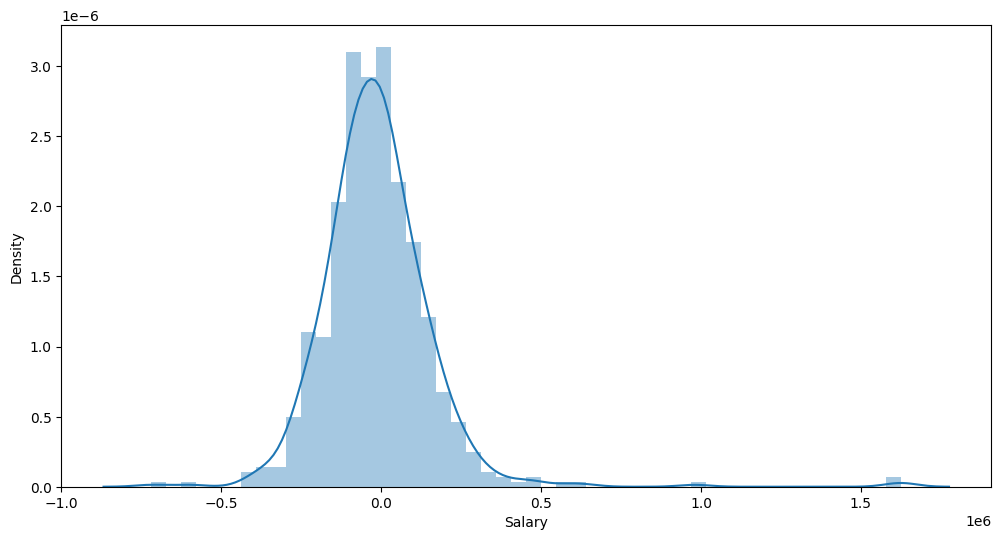

In [41]:
plt.figure(figsize = (12,6))
sns.distplot(diff)

In [42]:
xgb_r2_score = xgb.score(X_test, y_test)

print("XGBoost R2 Score: ", (xgb_r2_score))

XGBoost R2 Score:  0.026684186270624632


In [43]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Assuming you have a trained XGBoost model (xgb) and test data (X_test)
# Replace y_pred with the predictions made by your model
y_pred = xgb.predict(X_test)

# Define salary ranges or classes
# You should customize this based on your specific data
# For example, you can define salary ranges as a list of tuples like [(0, 50000), (50001, 100000), ...]
salary_ranges = [(0, 150000), (150001, 300000), (300001, 450000), (450001, 600000), (600001, 750000), (750001, 900000), (900001, 1050000), (1050001, float('inf'))]

# Function to map salary predictions to salary range
def map_to_salary_range(prediction, salary_ranges):
    for i, (lower, upper) in enumerate(salary_ranges):
        if lower <= prediction <= upper:
            return i
    return len(salary_ranges) - 1

# Map predictions to salary ranges
y_pred_ranges = [map_to_salary_range(pred, salary_ranges) for pred in y_pred]

# You should have the actual salary range labels for y_test
# Replace y_true with your actual labels
# Make sure y_true is in the same format as y_pred_ranges (integers)
y_true = [map_to_salary_range(true, salary_ranges) for true in y_test]

# Calculate the accuracy score
accuracy = accuracy_score(y_true, y_pred_ranges)

# Convert accuracy to a percentage
accuracy_percentage = accuracy * 100

print(f"Percentage of Accurate Predictions: {accuracy_percentage:.2f}%")


Percentage of Accurate Predictions: 40.30%
